# The Admin TUI

## Requiments
- Only npyscreen is required
- Official Doc.                 >>    https://npyscreen.readthedocs.io/index.html
- detaild PDF doc. (relase 2)   >>    https://buildmedia.readthedocs.org/media/pdf/npyscreen/latest/npyscreen.pdf
- Google group for Npyscreen    >>    https://groups.google.com/g/npyscreen
- Offical Git                   >>    https://github.com/npcole/npyscreen 

--------------------------------------
- This part to just show the images in the nootbook

In [2]:

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt


---------------------------------

- ### Part 1 : Make Boxes around Grid

In [1]:
# !/usr/bin/env python
### encoding: utf-8
import npyscreen

class MyGrid_H(npyscreen.GridColTitles):       
    def custom_print_cell(self, actual_cell, cell_display_value):
        
        if cell_display_value in ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"]:
           actual_cell.color = 'GOOD'

class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H

def myFunction(*args):
    F = npyscreen.Form(name='Example viewer')
    gd = F.add(InputBox_H, name="",max_height=5,max_width=100,width = 50)
    gd.values = []
    gd.values.append(
           ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"])
    myFW = F.add(npyscreen.TitleText,name="title text", rely=10,relx=75)
    F.edit()

if __name__ == '__main__':
    npyscreen.wrapper_basic(myFunction)

- ### Output 1

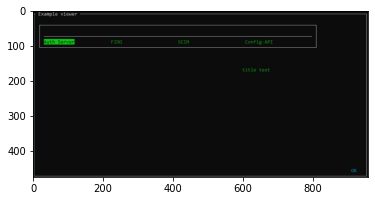

In [3]:
im_array = np.asarray(cv2.imread('grid_with_column.png'))
plt.imshow(im_array)
plt.show()

---------------------------------------------------

- ### Part 2 : Inhirit two diffrent calss from Box class and stracture rely,relx


In [ ]:
import curses
import npyscreen

class MyGrid_H(npyscreen.GridColTitles): 

    def __init__(self, screen, col_titles=None, *args, **keywords):
        super().__init__(screen, col_titles, *args, **keywords)
        self.col_margin=4,
        self.select_whole_line = False


    def custom_print_cell(self, actual_cell, cell_display_value):
        
        if cell_display_value in ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"]:
           actual_cell.color = 'WHITE'

class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H
    _contained_widget = npyscreen.TitleText

def myFunction(*args):    
    F = npyscreen.Form(name='',color="COLOR_GREEN", labelColor='COLOR_GREEN')
    F.add(npyscreen.TitleText,name="  Jassan Admin",editable=False)
    gd = F.add(InputBox_H, name="",max_height=5,max_width=115)
    gd.values = []
    gd.values.append(
           ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"])

    myFW = F.add(InputBox_H,name="title text", rely=10,relx=60)
    F.edit()
        
if __name__ == '__main__':
    npyscreen.wrapper_basic(myFunction)

- ### Output 2

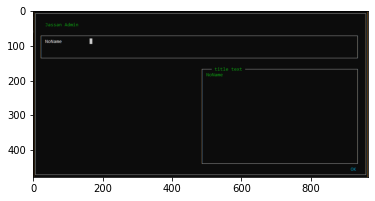

In [4]:
im_array = np.asarray(cv2.imread('spliting_multi_boxes.png'))
plt.imshow(im_array)
plt.show()

----------------------------------------------------------------

- ### Part 3 : Vertical Box with Data to select


In [ ]:
import npyscreen

class InputBox(npyscreen.BoxTitle):
    _contained_widget = npyscreen.TitleText
    _contained_widget_height = 2

class Form1(npyscreen.Form):
    def create(self):
        self.add(npyscreen.TitleText,name="  Jassan Admin",editable=False)##
        
        self.add(npyscreen.BoxTitle, name="",
                    custom_highlighting=True, values=["Basic", "Token","Logout",
                     "Timeout","URIs", "Encription","Client Properties", "Client Scripts","Save"],
                     value=[1, ],max_height=12,max_width=25,)
        self.add(npyscreen.TitleText,name='starting')


    def afterEditing(self):
        self.parentApp.setNextForm(None)

    def display_value(self, vl):
        return vl
        
        
class HopaApp(npyscreen.NPSAppManaged):
    def onStart(self):
        npyscreen.setTheme(npyscreen.Themes.ColorfulTheme)
        self.addForm("MAIN",Form1, name="MAIN" ) ##, color="CURSOR_INVERSE", 

if __name__ == "__main__":
    App = HopaApp()
    App.run()


- ### Output 3

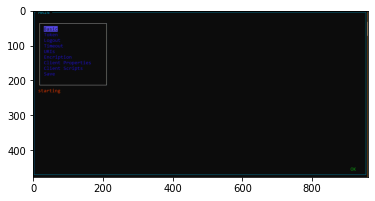

In [5]:
im_array = np.asarray(cv2.imread('part3_v_columns.PNG'))
plt.imshow(im_array)
plt.show()

-----------------------------------

### To DO Next
- Merge all of them
- Make certain value change on selection
- make row width smaller (not all 6 appears)


------------------------------------------
13/7/2022

----------------------------

- ### Part 4 : Merging All of the above to reach to the desired format


In [ ]:
#!/usr/bin/env python3
import npyscreen

######################### Classes to inherit from ########################


class InputWidget(npyscreen.TitleText):
    def __init__(self, *args, **keywords):
        super(InputWidget, self).__init__(*args, **keywords)
        self.name = 'test'
##########################################################################


class InputBox(npyscreen.BoxTitle):
    _contained_widget = npyscreen.TitleText
    _contained_widget_height = 2
##########################################################################


class multiContainedBox(npyscreen.BoxTitle):
    _contained_widget = [InputWidget, InputWidget, InputWidget]

    def make_contained_widget(self, contained_widget_arguments=None):
        self._my_widgets = []
        _rely = self.rely+1
        _relx = self.relx+2
        for widget in self._contained_widget:
            self._my_widgets.append(widget(self.parent,
                                    rely=_rely, relx=_relx,
                                    max_width=self.width, max_height=10,
                                           ))
        self.entry_widget = self._my_widgets[1]

    def update(self, clear=True):
        if self.hidden and clear:
            self.clear()
            return False
        elif self.hidden:
            return False
        super(multiContainedBox, self).update(clear=clear)
        for w in self._my_widgets:
            w.update(clear=clear)
##########################################################################


class MyGrid_H(npyscreen.GridColTitles):
    def custom_print_cell(self, actual_cell, cell_display_value):

        if cell_display_value in ["Auth Server", "FIDO", "SCIM",
                                  "Config-API", "Client-API", "Scripts"]:
            actual_cell.color = 'FORMDEFAULT'
##########################################################################


class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H
##########################################################################


class MainForm(npyscreen.FormBaseNew):
    def create(self):
        self.add_handlers({"^T": self.change_forms})
        y, x = self.useable_space()
        # Title of the screen
        self.Title = self.add(npyscreen.TitleText,
                              name="Jassan admin", value=None, editable=None)
        # The  Main Navigation
        self.gd = self.add(InputBox_H, name="", max_height=5,
                           max_width=110, relx=1, rely=3)
        self.gd.values = []
        self.gd.values.append(
            ["Auth Server", "FIDO", "SCIM", "Config-API", "Client-API", "Scripts"])
        # self.InputBox = self.add(multiContainedBox, name="Header",max_height=5,max_width=110,relx=1, rely=3,value='hopa')

        # The Side Navigation
        self.list = self.add(npyscreen.BoxTitle, name="",
                             custom_highlighting=True, values=["Basic", "Token", "Logout", "Timeout", "URIs", "Encription", "Client Properties", "Client Scripts", "Save"],
                             value=[], max_height=20, max_width=24, relx=1, rely=8)

        # self.InputBox2 = self.add(multiContainedBox, name="Side", max_height=20, max_width=24, relx=1, rely=8,value='asdf')

        # The Main Content
        self.InputBox3 = self.add(multiContainedBox, name="Content", max_height=20,
                                  max_width=86, relx=25, rely=8, value="main content", color='FORMDEFAULT')

        # END
    def on_ok(self):
        # Exit the application if the OK button is pressed.
        self.parentApp.switchForm(None)

    def change_forms(self, *args, **keywords):
        if self.name == "Navigate 1":
            change_to = "SECOND"
        elif self.name == "Navigate 2":
            change_to = "THIRD"
        else:
            change_to = "MAIN"

        self.parentApp.change_form(change_to)
    ### y = 30
    ### x = 119


class App(npyscreen.NPSAppManaged):
    def onStart(self):
        self.addForm("MAIN", MainForm, name="")


MyApp = App()
MyApp.run()

- ### Output 4

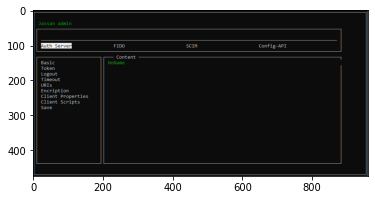

In [8]:
im_array = np.asarray(cv2.imread('merg.PNG'))
plt.imshow(im_array)
plt.show()

--------------------------------------

- ### Part 5 : Adding Multi Form In the same screen (Will be the invok for the selection)


In [ ]:

#!/usr/bin/env python3
import curses
from time import time
import npyscreen
import weakref


######################### Classes to inherit from ########################

class InputWidget(npyscreen.TitleText):
    def __init__(self, *args, **keywords):
        super(InputWidget, self).__init__(*args, **keywords)
        self.name = 'test'
##########################################################################
class InputBox(npyscreen.BoxTitle):
    _contained_widget = npyscreen.TitleText
    _contained_widget_height = 2
##########################################################################
class multiContainedBox(npyscreen.BoxTitle):
    _contained_widget = [InputWidget, InputWidget,InputWidget]

    def make_contained_widget(self, contained_widget_arguments=None):
        self._my_widgets = []
        _rely = self.rely+1
        _relx = self.relx+2
        for widget in self._contained_widget :
            self._my_widgets.append(widget(self.parent,
                                    rely=_rely, relx = _relx,
                                    max_width=self.width, max_height=10,
                                ))
        self.entry_widget = self._my_widgets[1]
    def update(self, clear=True):
        if self.hidden and clear:
            self.clear()
            return False
        elif self.hidden:
            return False
        super(multiContainedBox, self).update(clear=clear)
        for w in self._my_widgets:
            w.update(clear=clear)
##########################################################################
class MyGrid_H(npyscreen.GridColTitles):       
    def custom_print_cell(self, actual_cell, cell_display_value):
        
        if cell_display_value in ["Auth Server", "FIDO","SCIM",
                     "Config-API","Client-API", "Scripts"]:
           actual_cell.color = 'FORMDEFAULT'
##########################################################################
class InputBox_H(npyscreen.BoxTitle):
    _contained_widget = MyGrid_H
##########################################################################
class MainForm(npyscreen.FormBaseNew):
    def create(self):
        self.add_handlers({"^T": self.change_forms})
        y, x = self.useable_space()
        ####################   Title of the screen      
        self.Title = self.add(npyscreen.TitleText, name="Jassan admin", value=None, editable = None)
        ####################   The  Main Navigation     
        self.gd = self.add(InputBox_H, name="",max_height=5,max_width=110,relx=1, rely=3)
        self.gd.values = []
        self.gd.values.append(["Auth Server", "FIDO","SCIM","Config-API","Client-API", "Scripts"])   
        # self.InputBox = self.add(multiContainedBox, name="Header",max_height=5,max_width=110,relx=1, rely=3,value='hopa')
        
        #####################    The Side Navigation      
        self.list = self.add(npyscreen.BoxTitle, name="",
                    custom_highlighting=True, values=["Basic", "Token","Logout","Timeout","URIs", "Encription","Client Properties", "Client Scripts","Save"],
                     value=[],max_height=20,max_width=24, relx=1, rely=8)

        # self.InputBox2 = self.add(multiContainedBox, name="Side", max_height=20, max_width=24, relx=1, rely=8,value='asdf')
        
        ####################     The Main Content      
        self.InputBox3 = self.add(multiContainedBox, name="Content", max_height=20, max_width=86, relx=25, rely=8,value="main content",color='FORMDEFAULT')
       
        ####################      END            
    def on_ok(self):
        # Exit the application if the OK button is pressed.
        self.parentApp.switchForm(None)

    def change_forms(self, *args, **keywords):
        if self.name == "Navigate 1":
            change_to = "SECOND"
        elif self.name == "Navigate 2":
            change_to = "THIRD"
        else:
            change_to = "MAIN"

        self.parentApp.change_form(change_to)
### y = 30
### x = 119




############################### Start poing  ####################################
class MainAllForms(npyscreen.NPSAppManaged):
    def onStart(self):
        self.addForm("MAIN",       MainForm, name="Navigate 1", color="DANGER",)
        self.addForm("SECOND",     MainForm, name="Navigate 2", color="GOODHL",  )
        self.addForm("THIRD", MainForm, name="Navigate 3", color="CAUTION",)
        
    def onCleanExit(self):
        npyscreen.notify_wait("Goodbye!")
    
    def change_form(self, name):
        self.switchForm(name)     
        self.resetHistory()



MyApp = MainAllForms()
MyApp.run()

- ### Output 5

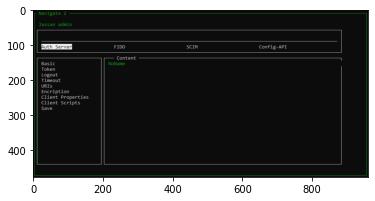

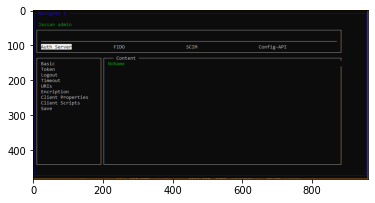

In [7]:
im_array = np.asarray(cv2.imread('with_navi2.PNG'))
plt.imshow(im_array)
plt.show()

im_array = np.asarray(cv2.imread('with_navi.PNG'))
plt.imshow(im_array)
plt.show()